In [2]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#from matplotlib.pyplot import figure

print("matplotlib version: {}".format(matplotlib.__version__))
import mglearn
print("mglearn version: {}".format(mglearn.__version__))

#read the data file
path = './Fire_Call_Data/30k_data.csv'
%time df = pd.read_csv(path)


matplotlib version: 2.2.2
mglearn version: 0.1.6
CPU times: user 306 ms, sys: 44.8 ms, total: 351 ms
Wall time: 358 ms


In [3]:
print("df.shape =", df.shape)
df2 = df[['Call Type','Location']]
df2 = df2.rename(index=str, columns={"Call Type":"callType"})
print("df2.shape =", df2.shape)
df2 = df2.copy()

df2.loc[:,'tmpcol'] = df2['Location'].map(lambda x: x.lstrip('(').rstrip(')'))

df2['LAT'] = df2['tmpcol'].str.split(',').str[0].astype(float)
df2['LON'] = df2['tmpcol'].str.split(',').str[1].astype(float)*-1
#df2['callType'] = df2['callType'].str

df2 = df2.drop('tmpcol',1)
df2 = df2.drop('Location',1)
print("\n df2.types",df2.dtypes)


df2






df.shape = (30000, 34)
df2.shape = (30000, 2)

 df2.types callType     object
LAT         float64
LON         float64
dtype: object


,callType,LAT,LON
0,Medical Incident,37.798711,122.435888
1,Medical Incident,37.784199,122.414268
2,Medical Incident,37.776683,122.454983
3,Medical Incident,37.782603,122.408539
4,Medical Incident,37.774653,122.405118
5,Structure Fire,37.790565,122.405574
6,Medical Incident,37.767070,122.413260
7,Medical Incident,37.780699,122.403921
8,Medical Incident,37.747006,122.492022
9,Medical Incident,37.775307,122.457443


In [137]:
typesOfCalls = pd.DataFrame(df2.callType.unique(),columns={"Types"})
typesOfCalls



,Types
0,Medical Incident
1,Structure Fire
2,Traffic Collision
3,Alarms
4,Outside Fire
5,Vehicle Fire
6,Elevator / Escalator Rescue
7,Citizen Assist / Service Call
8,Gas Leak (Natural and LP Gases)
9,Smoke Investigation (Outside)


Text(0.5,1,'Locations of all calls 30k records')

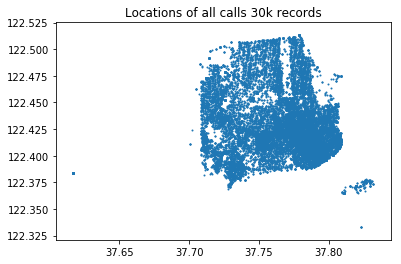

In [4]:
plt.scatter(df2.LAT,df2.LON,s=1)
plt.title("Locations of all calls 30k records")

shape:  (3848, 3)


Text(0.5,1,'Structure Fire calls 3848 records')

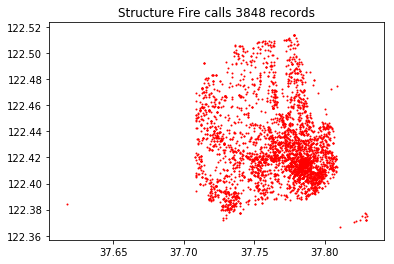

In [5]:
df3 = df2.loc[df2['callType'] == "Structure Fire"]
print("shape: ",df3.shape)
plt.scatter(df3.LAT,df3.LON,s=1,color='red')
plt.title("Structure Fire calls 3848 records")

shape:  (164, 3)


Text(0.5,1,'Water Resuce calls 164 records')

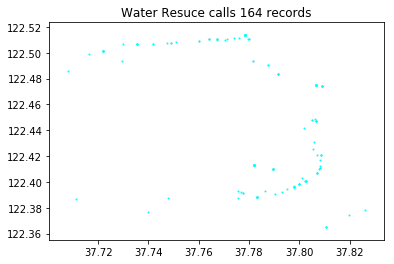

In [6]:

df4 = df2.loc[df2['callType'] == "Water Rescue"]
print("shape: ",df4.shape)
plt.scatter(df4.LAT,df4.LON,s=1,color='aqua')
plt.title("Water Resuce calls 164 records")






shape:  (1227, 3)


Text(0.5,1,'Traffic Collision calls ')

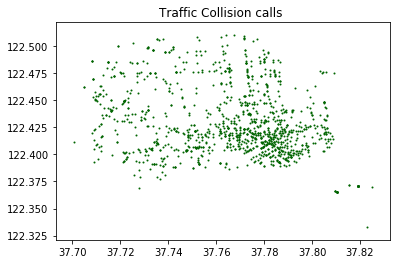

In [7]:
df5 = df2.loc[df2['callType'] == "Traffic Collision"]
print("shape: ",df5.shape)
plt.scatter(df5.LAT,df5.LON,s=1,color='darkgreen')
plt.title("Traffic Collision calls ")


Text(0.5,1,'Fire calls')

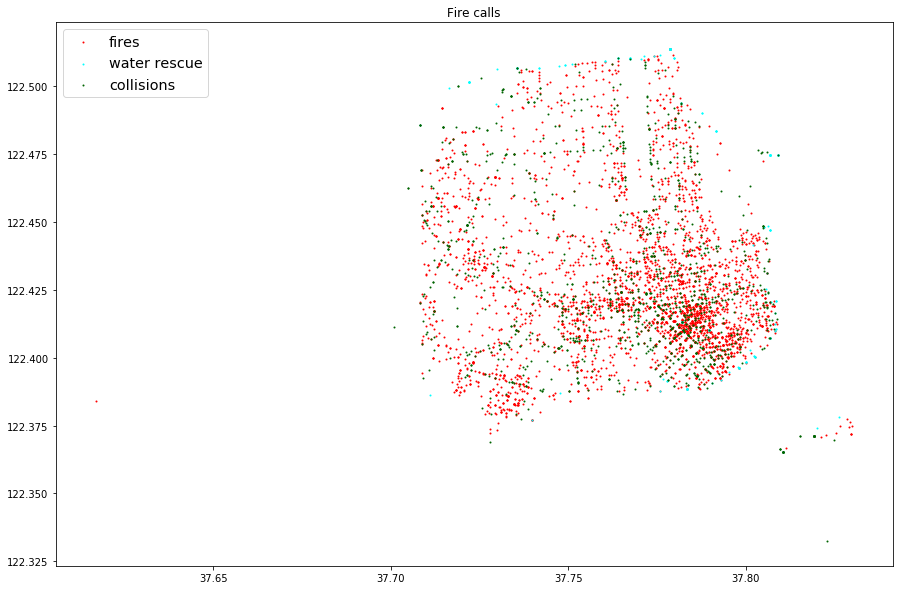

In [8]:
plt.figure(figsize=(15,10))
#plt.subplot(111)
#plt.scatter(df2.LAT,df2.LON,s=1)
#plt.title("Locations of all calls 30k records")

#plt.subplot(111)
df3 = df2.loc[df2['callType'] == "Structure Fire"]
plt.scatter(df3.LAT,df3.LON,s=1, color='red', label="fires")
#plt.title("Structure Fire calls 3848 records")

#plt.subplot(111)
plt.scatter(df4.LAT,df4.LON,s=1,color='aqua', label='water rescue')
#plt.title("Water Resuce calls 164 records")

#plt.subplot(111)
plt.scatter(df5.LAT,df5.LON,s=1,color='darkgreen', label="collisions")
#plt.title("Traffic Collision calls ")

plt.legend(loc='upper left',ncol=1,fontsize='x-large')
plt.title("Fire calls")




	Cluster anlysis on Collision calls 


lat min 37.7008326283982
lat max 37.8248426772439
lon min 122.332574620522
lon max 122.510341318055

2  Cluster Centers:
 [[ 37.77329932 122.411705  ]
 [ 37.74970437 122.46633991]]

5 Cluster Centers:
 [[ 37.77861208 122.42637691]
 [ 37.73870799 122.40841821]
 [ 37.79070348 122.39890018]
 [ 37.77289513 122.4772715 ]
 [ 37.72619119 122.4652423 ]]


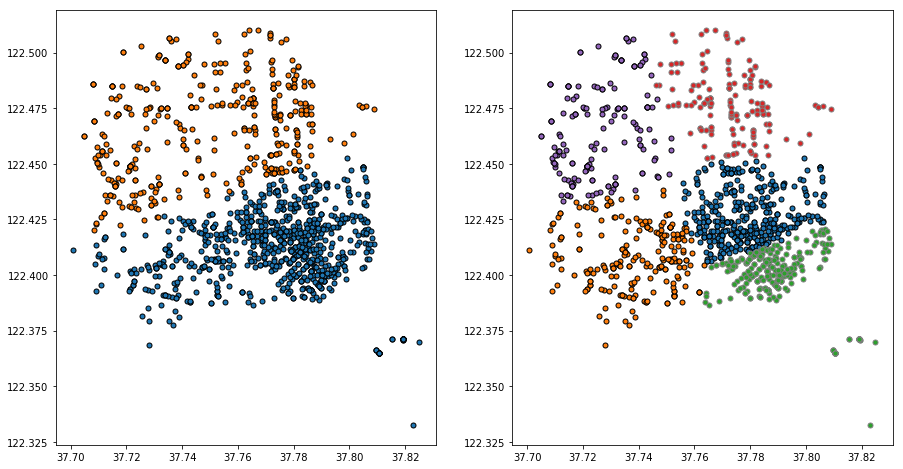

In [139]:
df6 =df5.drop('callType',1)

print("\n\tCluster anlysis on Collision calls \n\n")
print('lat min',df6.LAT.min())
print('lat max',df6.LAT.max())
print('lon min',df6.LON.min())
print('lon max',df6.LON.max())


X = df6.values

fig,  axes  =  plt.subplots(1, 2, figsize=(15, 8))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1],  assignments,markers='.', ax=axes[0])
twoclusterCenter = kmeans.cluster_centers_


# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, markers='.', ax=axes[1])
fiveclusterCenter = kmeans.cluster_centers_

print('\n2  Cluster Centers:\n',twoclusterCenter)
print('\n5 Cluster Centers:\n',fiveclusterCenter)







	Cluster anlysis on Structure Fire calls 


lat min 37.6168823239251
lat max 37.82999157471
lon min 122.36673920427
lon max 122.513648358636

2  Cluster Centers:
 [[ 37.77412458 122.41407895]
 [ 37.7481272  122.46183674]]

5 Cluster Centers:
 [[ 37.77540421 122.43370294]
 [ 37.78769477 122.41044362]
 [ 37.73960451 122.40304269]
 [ 37.72369082 122.44981498]
 [ 37.76599955 122.48295616]]


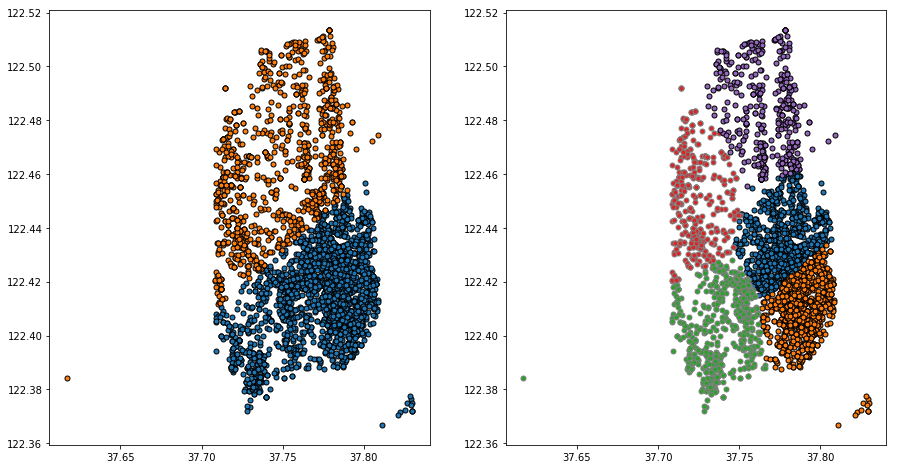

In [143]:

X = df3.drop('callType',1).values

print("\n\tCluster anlysis on Structure Fire calls \n\n")
print('lat min',df3.LAT.min())
print('lat max',df3.LAT.max())
print('lon min',df3.LON.min())
print('lon max',df3.LON.max())


fig,  axes  =  plt.subplots(1, 2, figsize=(15, 8))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1],  assignments,markers='.', ax=axes[0])
twoclusterCenter = kmeans.cluster_centers_


# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, markers='.', ax=axes[1])
fiveclusterCenter = kmeans.cluster_centers_

print('\n2  Cluster Centers:\n',twoclusterCenter)
print('\n5 Cluster Centers:\n',fiveclusterCenter)



	Cluster anlysis on Water Rescue calls 


lat min 37.7080857299394
lat max 37.8262198186734
lon min 122.365138272289
lon max 122.513648358636

2  Cluster Centers:
 [[ 37.79324915 122.40552245]
 [ 37.77044146 122.49965258]]

5 Cluster Centers:
 [[ 37.7794911  122.40136899]
 [ 37.77527514 122.50993336]
 [ 37.73161224 122.50346218]
 [ 37.80475687 122.40109884]
 [ 37.80462461 122.46796834]]


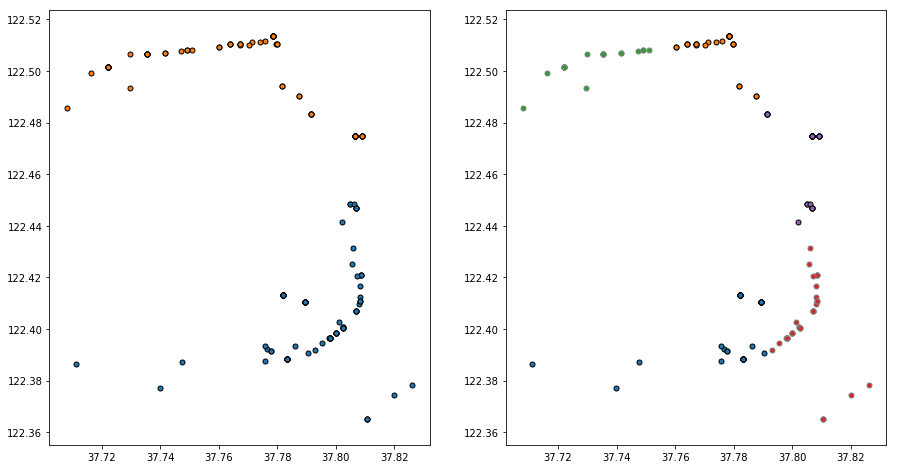

In [144]:

X = df4.drop('callType',1).values

print("\n\tCluster anlysis on Water Rescue calls \n\n")
print('lat min',df4.LAT.min())
print('lat max',df4.LAT.max())
print('lon min',df4.LON.min())
print('lon max',df4.LON.max())


fig,  axes  =  plt.subplots(1, 2, figsize=(15, 8))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1],  assignments,markers='.', ax=axes[0])
twoclusterCenter = kmeans.cluster_centers_


# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, markers='.', ax=axes[1])
fiveclusterCenter = kmeans.cluster_centers_

print('\n2  Cluster Centers:\n',twoclusterCenter)
print('\n5 Cluster Centers:\n',fiveclusterCenter)